<a href="https://colab.research.google.com/github/sebasmos/NASA-SpaceApps_Pneuma/blob/master/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import keras
import matplotlib.pyplot as plt
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

2.2.0
32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [2]:
#cargamos el testing set
from google.colab import drive   
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Firebase connection

import firebase_admin
from firebase_admin import credentials

cred = credentials.Certificate("drive/My Drive/Colab Notebooks/landing-pneuma-firebase-adminsdk-ty8km-882b7473ca.json")
firebase_admin.initialize_app(cred)

ValueError: ignored

In [4]:
#Extraemos los datos
#TestingSet = pd.read_csv('drive/My Drive/Colab Notebooks/test.csv')

TrainingSet = pd.read_csv('drive/My Drive/Colab Notebooks/train.csv')
TrainingSet[TrainingSet['Country/Region']=='Colombia']

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
5040,7441,NaN,Colombia,4.5709,-74.2973,2020-01-22,0,0
5041,7442,NaN,Colombia,4.5709,-74.2973,2020-01-23,0,0
5042,7443,NaN,Colombia,4.5709,-74.2973,2020-01-24,0,0
5043,7444,NaN,Colombia,4.5709,-74.2973,2020-01-25,0,0
5044,7445,NaN,Colombia,4.5709,-74.2973,2020-01-26,0,0
...,...,...,...,...,...,...,...,...
5100,7501,NaN,Colombia,4.5709,-74.2973,2020-03-22,231,2
5101,7502,NaN,Colombia,4.5709,-74.2973,2020-03-23,277,3
5102,7503,NaN,Colombia,4.5709,-74.2973,2020-03-24,378,3
5103,7504,NaN,Colombia,4.5709,-74.2973,2020-03-25,470,4


In [5]:
#Extraemos las features TrainingSet
Train_Id            = TrainingSet[['Id']].values
Train_PState        = TrainingSet[['Province/State']].values
Train_CountryRegion = TrainingSet[['Country/Region']].values
Train_Lat     = TrainingSet[['Lat']].values
Train_Long = TrainingSet[['Long']].values
Train_Date = TrainingSet[['Date']].values
Train_Confirmed = TrainingSet[['ConfirmedCases']].values
Train_Fatal = TrainingSet[['Fatalities']].values
# Dictionary 
data = {
    'Country':  Train_CountryRegion,
    'Date': Train_Date,
    'Confirmed' : Train_Confirmed
}

#Extraemos las features TestingSet
'''
Testing_Id = TrainingSet[['Id']].values
Testing_PState = TrainingSet[['Province/State']].values
Testing_CountryRegion = TrainingSet[['Country/Region']].values
Testing_Lat = TrainingSet[['Lat']].values
Testing_Long = TrainingSet[['Long']].values
Testing_Date = TrainingSet[['Date']].values
Testing_Confirmed = TrainingSet[['ConfirmedCases']].values
Testing_Fatal = TrainingSet[['Fatalities']].values
''' 

"\nTesting_Id = TrainingSet[['Id']].values\nTesting_PState = TrainingSet[['Province/State']].values\nTesting_CountryRegion = TrainingSet[['Country/Region']].values\nTesting_Lat = TrainingSet[['Lat']].values\nTesting_Long = TrainingSet[['Long']].values\nTesting_Date = TrainingSet[['Date']].values\nTesting_Confirmed = TrainingSet[['ConfirmedCases']].values\nTesting_Fatal = TrainingSet[['Fatalities']].values\n"

In [6]:
print("Number of Country/Region: ", TrainingSet['Country/Region'].nunique())
print("Dates go from day",  min(TrainingSet['Date']),"to day", max(TrainingSet['Date']), ", a total of", TrainingSet['Date'].nunique(), "days")
print("Countries with Province/State informed: ", TrainingSet[TrainingSet['Province/State'].isna()==False]['Country/Region'].unique())


Number of Country/Region:  163
Dates go from day 2020-01-22 to day 2020-03-26 , a total of 65 days
Countries with Province/State informed:  ['Australia' 'Canada' 'China' 'Cruise Ship' 'Denmark' 'France'
 'Netherlands' 'US' 'United Kingdom']


In [7]:
# Sequential es el modelo mas simple
model = keras.Sequential()
model.add(keras.layers.Dense(1,input_shape=(1,)))
# indicamos que tan rapido vamos a ajustar el modelo
model.compile(keras.optimizers.Adam(lr=1), 'mean_squared_error')
#entrenar el modelo 30 veces, recorrerla 30 veces. 10 puntos de 
#datos que entran a la red al tiempo
model.fit(Train_Confirmed, Train_Id,epochs = 30, batch_size=10)

Epoch 1/30
17894/17894 [==============================] - 2s 93us/step - loss: 277558133.2608
Epoch 2/30
17894/17894 [==============================] - 1s 79us/step - loss: 239082538.7907
Epoch 3/30
17894/17894 [==============================] - 1s 84us/step - loss: 238959030.0706
Epoch 4/30
17894/17894 [==============================] - 1s 79us/step - loss: 247934350.1312
Epoch 5/30
17894/17894 [==============================] - 1s 78us/step - loss: 97851934.7395
Epoch 6/30
17894/17894 [==============================] - 1s 78us/step - loss: 175718806.3173
Epoch 7/30
17894/17894 [==============================] - 1s 84us/step - loss: 85397671.8218
Epoch 8/30
17894/17894 [==============================] - 1s 83us/step - loss: 203455801.3150
Epoch 9/30
17894/17894 [==============================] - 2s 85us/step - loss: 133091946.9988
Epoch 10/30
17894/17894 [==============================] - 2s 95us/step - loss: 149002979.3513
Epoch 11/30
17894/17894 [==============================] - 2s

Number of Cases in Colombia:  ('ConfirmedCases', 'sum')


Text(0.5, 0, 'Date')

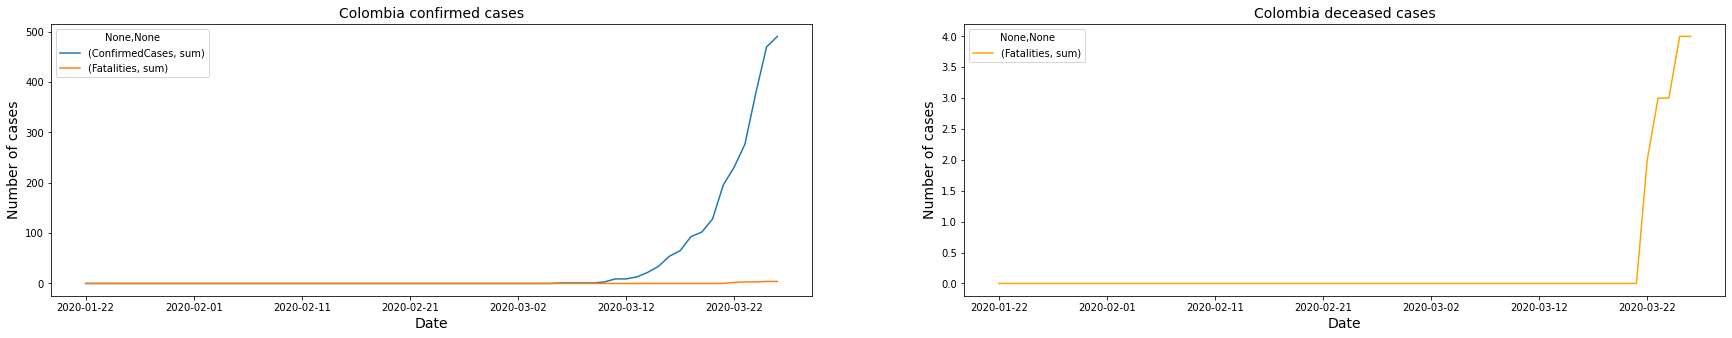

In [8]:
#confirmed_total_date = TrainingSet.groupby(['Date']).agg({'ConfirmedCases':['sum']})
#fatalities_total_date = TrainingSet.groupby(['Date']).agg({'Fatalities':['sum']})
#total_date = confirmed_total_date.join(fatalities_total_date)
confirmed_total_date_Colombia = TrainingSet[TrainingSet['Country/Region']=='Colombia'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
print("Number of Cases in Colombia: ", max(confirmed_total_date_Colombia))
fatalities_total_date_Colombia = TrainingSet[TrainingSet['Country/Region']=='Colombia'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Colombia = confirmed_total_date_Colombia.join(fatalities_total_date_Colombia)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,5))
total_date_Colombia.plot(ax=ax1)
ax1.set_title("Colombia confirmed cases", size=14)
ax1.set_ylabel("Number of cases", size=14)
ax1.set_xlabel("Date", size=14)
fatalities_total_date_Colombia.plot(ax=ax2, color='orange')
ax2.set_title("Colombia deceased cases", size=14)
ax2.set_ylabel("Number of cases", size=14)
ax2.set_xlabel("Date", size=14)

In [0]:
#TrainingSet.plot(kind='scatter',x='Train_Id',y='Train_Confirmed',title='Infectados en Colombia')
#y_predicted = model.predict(Train_Confirmed)
#plt.plot(Train_Confirmed,y_predicted, color='red')
total_date_Colombia.describe()

**Data is separated by country for individual analysis**
1. Colombia - South America


In [97]:
#Colombian context 
confirmed_total_date_Colombia = TrainingSet[TrainingSet['Country/Region']=='Colombia'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Colombia = TrainingSet[TrainingSet['Country/Region']=='Colombia'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Colombia = confirmed_total_date_Colombia.join(fatalities_total_date_Colombia)

Confirmed_Patients = confirmed_total_date_Colombia[['ConfirmedCases']].values

Colombian_N = []
Colombian_Date = []
for x in confirmed_total_date_Colombia.values:
    Colombian_N.append(int(list(x)[0]))
#print(Colombian_N)
Colombia_Datasets = TrainingSet[TrainingSet['Country/Region']=='Colombia']
Colombian_Dates = Colombia_Datasets['Date']
for y in Colombian_Dates:
    Colombian_Date.append(y)
Data_Colombia={
    '_Dates' : Colombian_Date[1:1000],
    '_Confirmed_Patients': Colombian_N[1:1000],
    '_Country' : 'Colombia'
}
print(Data_Colombia)
    
    

{'_Dates': ['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26'], '_Confirmed_Patients': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [100]:
# Global data 
Dates = []
Country = 'Global'
Confirmed_Patients=[]
for x in TrainingSet[['Date']].values:
  Dates.append(list(x)[0])
#print(Train_Confirmed)
for y in Train_Confirmed:
  Confirmed_Patients.append(int(list(y)[0]))

data = {
    '_Dates':Dates[1:1000],
    '_Confirmed_Patients':Confirmed_Patients[1:1000],
    '_Country': Country
}
print(data)



{'_Dates': ['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01

In [101]:
from firebase_admin import firestore

db = firestore.client()
# Global data is prepared
doc_ref = db.collection("data").document("landing_data_Global")
doc_ref.set(data)
# Colombian data is prepared
doc_ref = db.collection("data").document("landing_data_Colombia")
doc_ref.set(Data_Colombia)


update_time {
  seconds: 1590978305
  nanos: 747331000
}

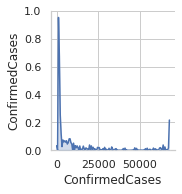

In [155]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import seaborn as sns
#limpiamos datos

dataset = TrainingSet.copy()
dataset.isna().sum()


#eliminamos filas vacías
dataset = dataset.dropna()

train_dataset = TrainingSet.sample(frac=0.8,random_state=0)
test_dataset = TrainingSet.drop(train_dataset.index)

sns.pairplot(train_dataset[["ConfirmedCases"]], diag_kind="kde")

In [156]:
#Estadísticas generales
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Id,14315.0,13251.152008,7619.144518,1.0000,6653.5000,13316.0000,19846.0000,26382.0000
Lat,14315.0,26.447518,22.858408,-41.4545,13.0000,33.0000,42.6026,71.7069
Long,14315.0,4.127978,79.590837,-157.4983,-71.5301,9.5018,57.5000,174.8860
ConfirmedCases,14315.0,334.429969,3586.812644,0.0000,0.0000,0.0000,10.0000,67801.0000
Fatalities,14315.0,12.420678,175.268306,0.0000,0.0000,0.0000,0.0000,6077.0000


In [158]:
#normalizamos NO 23/05/2929
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Id                13251.152008
Lat                  26.447518
Long                  4.127978
ConfirmedCases      334.429969
Fatalities           12.420678
Name: mean, dtype: float64

In [0]:
#modelo
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [160]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [161]:
example_batch = TrainingSet[:10]
example_result = model.predict(example_batch)
example_result

ValueError: ignored